In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [30]:
df= pd.read_csv('E:/TSEL_DSA/raw/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [31]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


(891, 12)

In [32]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [33]:
df.describe(include=['object'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Ridsdale, Miss. Lucy",male,1601,C23 C25 C27,S
freq,1,577,7,4,644


In [34]:
count_missing = df.isnull().sum()
missing = count_missing[count_missing>0]
missing.head()

Age         177
Cabin       687
Embarked      2
dtype: int64

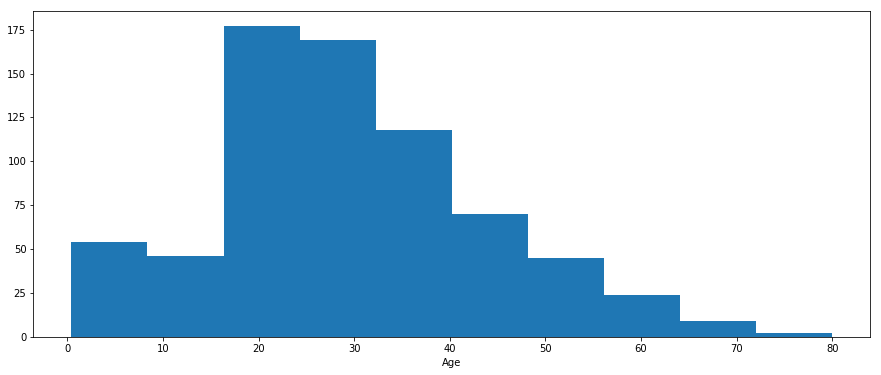

In [35]:
plt.figure(figsize=(15,6))

plt.subplot(1,1,1)
plt.hist(df['Age'])
plt.xlabel('Age')


plt.show()

In [36]:
median = df[['Age']].median(axis=0)
df['Age']=df[['Age']].fillna(median,axis=0)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [37]:
missing_cat= missing[missing.index.isin(['Cabin','Embarked'])]

In [38]:
mode = df[missing_cat.index].mode(axis=0)
mode = mode.loc[0]
df[missing_cat.index]=df[missing_cat.index].fillna(mode,axis=0)

In [39]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S


In [40]:
count_missing = df.isnull().sum()
missing = count_missing[count_missing>0]
missing.head()

Series([], dtype: int64)

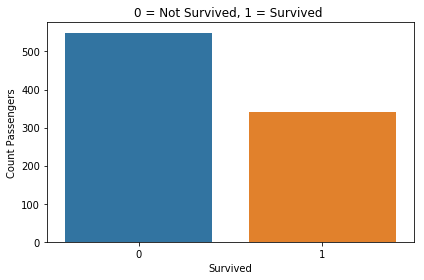

In [46]:
import seaborn as sns
fig, x = plt.subplots()
sns.countplot(x='Survived' , data=df).set_title('0 = Not Survived, 1 = Survived ')
x.set(ylabel='Count Passengers')
plt.tight_layout()

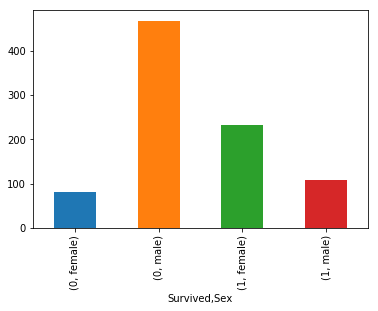

In [41]:
df.groupby(['Survived','Sex']).count().Name
df.groupby(['Survived','Sex']).count().Name.plot(kind='bar')

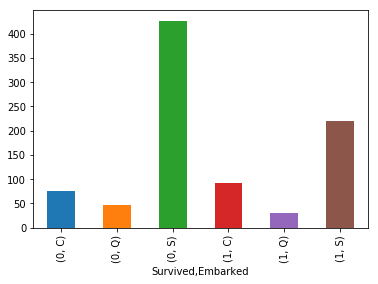

In [53]:
df.groupby(['Survived','Embarked']).count().Name
df.groupby(['Survived','Embarked']).count().Name.plot(kind='bar')

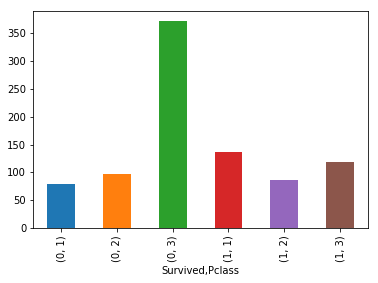

In [54]:
df.groupby(['Survived','Pclass']).count().Name
df.groupby(['Survived','Pclass']).count().Name.plot(kind='bar')

In [43]:
survived_sex = pd.crosstab(index=df.Survived, columns = [df['Pclass'],df['Sex']],margins=True)
survived_sex

Pclass        1           2           3       All
Sex      female male female male female male     
Survived                                         
0             3   77      6   91     72  300  549
1            91   45     70   17     72   47  342
All          94  122     76  108    144  347  891

In [51]:
survived = df['Survived'].value_counts().reset_index(name='Count')
total = survived.Count/survived.Count.sum()
survived['pct']=total
survived

,index,Count,pct
0,0,549,0.616162
1,1,342,0.383838
